In [ ]:

#step_1
#import numpy,pandas,matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Module warnings supplies several exception classes that represent warnings.
import warnings
warnings.filterwarnings("ignore")


# set to display all the columns in the dataset None helps to display all columns
pd.set_option("display.max_columns",None)



#to run sql queries on Dataframe (SQL syntax in python environment)
import pandasql as psql

In [ ]:
#Load the fd data

fd =pd.read_csv(r"C:\Users\priya\Downloads\bs140513_032310.csv\bs140513_032310.csv",header=0)

#copy to back-up file

fd_bk = fd.copy()

#display the first 5 records

fd.head(50)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
#info of the dataset

fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
#check iof there are duplicate values

fd_dup = fd[fd.duplicated(keep = 'last')]
fd_dup

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


In [5]:
#display the columns

fd.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [6]:
#checking the null values in the dataset

fd.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [7]:
fd.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [8]:
fd.shape

(594643, 10)

In [9]:
cols = ['customer','age','gender','zipcodeOri','merchant','zipMerchant','category']
for i in cols:
    #use label encoder for target variables

    from sklearn.preprocessing import LabelEncoder
    LE=LabelEncoder()
    fd[i]=LE.fit_transform(fd[i])

In [10]:
fd['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [11]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

fraud_count = fd.fraud.value_counts()
print('Class 0:', fraud_count[0])
print('Class 1:',fraud_count[1])
print('Proportion:', round(fraud_count[0] / fraud_count[1], 2), ': 1')
print('Total bank records:', len(fd))

Class 0: 587443
Class 1: 7200
Proportion: 81.59 : 1
Total bank records: 594643


In [12]:
#splitting the dataset on basis of frauad value

q1 = psql.sqldf('select * from fd where fraud=1')
q2 = psql.sqldf('select * from fd where fraud=0')

In [13]:
#taking the 10% of the non-fradulent data

q3=q2.groupby('fraud',group_keys=False).apply(lambda x:x.sample(frac=0.1))

In [14]:
#merging both q1 and q3 dataframe

fd=pd.concat([q1,q3])

In [15]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

fraud_count = fd.fraud.value_counts()
print('Class 0:', fraud_count[0])
print('Class 1:',fraud_count[1])
print('Proportion:', round(fraud_count[0] / fraud_count[1], 2), ': 1')
print('Total bank records:', len(fd))

Class 0: 58744
Class 1: 7200
Proportion: 8.16 : 1
Total bank records: 65944


In [16]:
#checking the null values in the dataset

fd.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [17]:
#Identify the independent and Target (dependent) variable
IndepVar = []
for col in fd.columns:
    if col != 'fraud':
        IndepVar.append(col)

TargetVar = 'fraud'
x = fd[IndepVar]
y = fd[TargetVar]

In [18]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46160, 9), (19784, 9), (46160,), (19784,))

In [19]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [20]:
fraud_count=y_train.value_counts()
print("Proportion: ",round(fraud_count[0]/fraud_count[1],2),':1')


Proportion:  8.16 :1


In [21]:
#load the  dataset
EMResults1 =  pd.read_csv(r"C:\Users\priya\Downloads\EMResults.csv", header=0)

In [22]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# svm linear kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[ 1262   901]
 [   14 17607]]
Outcome values : 
 1262 901 14 17607
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.58      0.73      2163
           0       0.95      1.00      0.97     17621

    accuracy                           0.95     19784
   macro avg       0.97      0.79      0.85     19784
weighted avg       0.96      0.95      0.95     19784

Accuracy : 95.4 %
Precision : 98.9 %
Recall : 58.3 %
F1 Score : 0.734
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 79.1 %
MCC : 0.74
roc_auc_score: 0.791


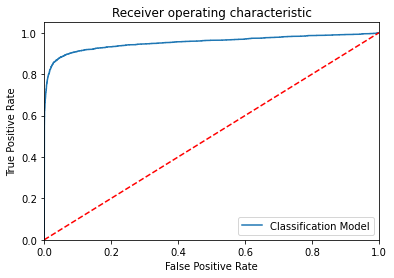

-----------------------------------------------------------------------------------------------------


In [23]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# svm polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 1428   735]
 [   39 17582]]
Outcome values : 
 1428 735 39 17582
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.66      0.79      2163
           0       0.96      1.00      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.97      0.83      0.88     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.1 %
Precision : 97.3 %
Recall : 66.0 %
F1 Score : 0.787
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 82.9 %
MCC : 0.784
roc_auc_score: 0.829


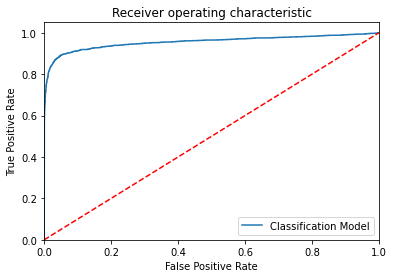

-----------------------------------------------------------------------------------------------------


In [24]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# svm sigmoid kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[1062 1101]
 [8945 8676]]
Outcome values : 
 1062 1101 8945 8676
Classification report : 
               precision    recall  f1-score   support

           1       0.11      0.49      0.17      2163
           0       0.89      0.49      0.63     17621

    accuracy                           0.49     19784
   macro avg       0.50      0.49      0.40     19784
weighted avg       0.80      0.49      0.58     19784

Accuracy : 49.2 %
Precision : 10.6 %
Recall : 49.1 %
F1 Score : 0.175
Specificity or True Negative Rate : 49.2 %
Balanced Accuracy : 49.2 %
MCC : -0.01
roc_auc_score: 0.492


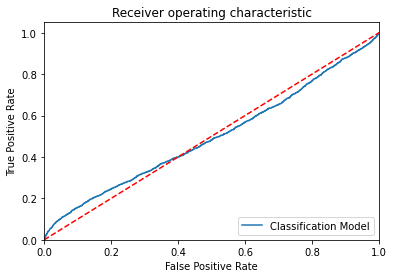

-----------------------------------------------------------------------------------------------------


In [25]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# svm gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 2077    86]
 [  911 16710]]
Outcome values : 
 2077 86 911 16710
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.96      0.81      2163
           0       0.99      0.95      0.97     17621

    accuracy                           0.95     19784
   macro avg       0.84      0.95      0.89     19784
weighted avg       0.96      0.95      0.95     19784

Accuracy : 95.0 %
Precision : 69.5 %
Recall : 96.0 %
F1 Score : 0.806
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 95.4 %
MCC : 0.792
roc_auc_score: 0.954


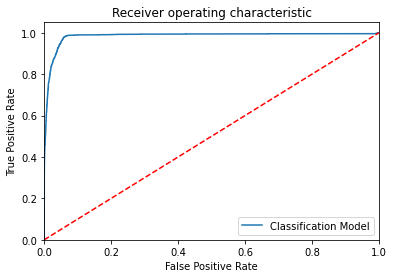

-----------------------------------------------------------------------------------------------------


In [26]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [27]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,1262,901,14,17607,0.954,0.989,0.583,0.734,0.999,0.740,0.791327,0.791
1,SVM - Polynominal,1428,735,39,17582,0.961,0.973,0.660,0.787,0.998,0.784,0.828990,0.829
2,SVM - Sigmoid,1062,1101,8945,8676,0.492,0.106,0.491,0.175,0.492,-0.010,0.491676,0.492
3,SVM - Gaussian,2077,86,911,16710,0.950,0.695,0.960,0.806,0.948,0.792,0.954270,0.954


In [28]:
EMResults1=pd.read_csv(r"C:\Users\priya\Downloads\EMResults.csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# compare all algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  925  1238]
 [    9 17612]]
Outcome values : 
 925 1238 9 17612
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.43      0.60      2163
           0       0.93      1.00      0.97     17621

    accuracy                           0.94     19784
   macro avg       0.96      0.71      0.78     19784
weighted avg       0.94      0.94      0.93     19784

Accuracy : 93.7 %
Precision : 99.0 %
Recall : 42.8 %
F1 Score : 0.597
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 71.4 %
MCC : 0.628
roc_auc_score: 0.714


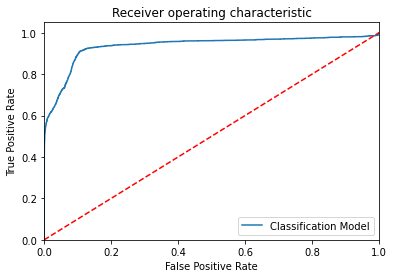

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1907   256]
 [  203 17418]]
Outcome values : 
 1907 256 203 17418
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.88      0.89      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.94      0.94      0.94     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 97.7 %
Precision : 90.4 %
Recall : 88.2 %
F1 Score : 0.893
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 93.5 %
MCC : 0.88
roc_auc_score: 0.935


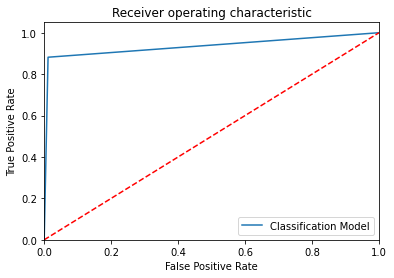

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1949   214]
 [  139 17482]]
Outcome values : 
 1949 214 139 17482
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.90      0.92      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.96      0.95      0.95     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 98.2 %
Precision : 93.3 %
Recall : 90.1 %
F1 Score : 0.917
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 94.6 %
MCC : 0.907
roc_auc_score: 0.947


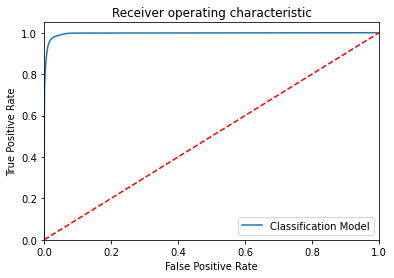

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1971   192]
 [  133 17488]]
Outcome values : 
 1971 192 133 17488
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.91      0.92      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.96      0.95      0.96     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 98.4 %
Precision : 93.7 %
Recall : 91.1 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 95.2 %
MCC : 0.915
roc_auc_score: 0.952


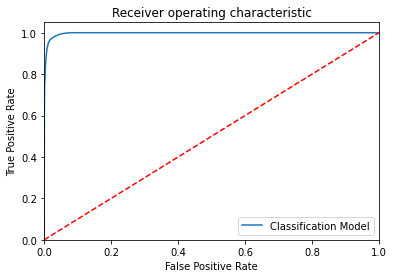

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1806   357]
 [  323 17298]]
Outcome values : 
 1806 357 323 17298
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.83      0.84      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.97     19784
   macro avg       0.91      0.91      0.91     19784
weighted avg       0.97      0.97      0.97     19784

Accuracy : 96.6 %
Precision : 84.8 %
Recall : 83.5 %
F1 Score : 0.842
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 90.8 %
MCC : 0.822
roc_auc_score: 0.908


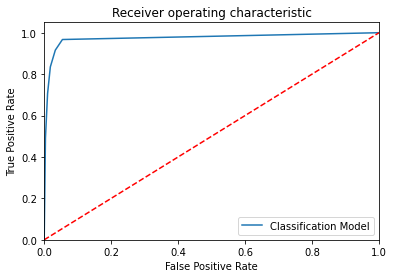

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 2077    86]
 [  911 16710]]
Outcome values : 
 2077 86 911 16710
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.96      0.81      2163
           0       0.99      0.95      0.97     17621

    accuracy                           0.95     19784
   macro avg       0.84      0.95      0.89     19784
weighted avg       0.96      0.95      0.95     19784

Accuracy : 95.0 %
Precision : 69.5 %
Recall : 96.0 %
F1 Score : 0.806
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 95.4 %
MCC : 0.792
roc_auc_score: 0.954


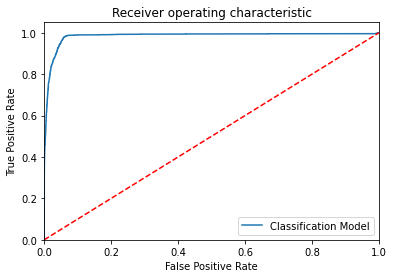

-----------------------------------------------------------------------------------------------------


In [29]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [30]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),925,1238,9,17612,0.937,0.990,0.428,0.597,0.999,0.628,0.713568,0.714
1,DecisionTreeClassifier(),1907,256,203,17418,0.977,0.904,0.882,0.893,0.988,0.880,0.935063,0.935
2,"(DecisionTreeClassifier(max_features='auto', r...",1949,214,139,17482,0.982,0.933,0.901,0.917,0.992,0.907,0.946588,0.946
3,"(ExtraTreeClassifier(random_state=936030666), ...",1971,192,133,17488,0.984,0.937,0.911,0.924,0.992,0.915,0.951843,0.952
4,KNeighborsClassifier(),1806,357,323,17298,0.966,0.848,0.835,0.842,0.982,0.822,0.908311,0.908
5,"SVC(class_weight='balanced', probability=True,...",2077,86,911,16710,0.950,0.695,0.960,0.806,0.948,0.792,0.954270,0.954


In [31]:
#load the  dataset
KNN_Results =  pd.read_csv(r"C:\Users\priya\Downloads\KNN_Results.csv", header=0)

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# knn algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1775   388]
 [  360 17261]]
Outcome values : 
 1775 388 360 17261
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.82      0.83      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.90      0.90      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.2 %
Precision : 83.1 %
Recall : 82.1 %
F1 Score : 0.826
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 90.0 %
MCC : 0.805
roc_auc_score: 0.9


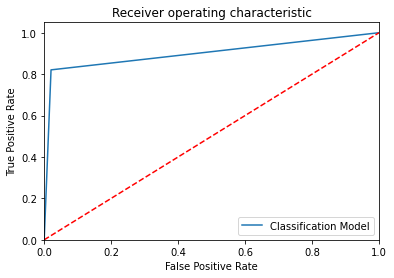

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1522   641]
 [  200 17421]]
Outcome values : 
 1522 641 200 17421
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.70      0.78      2163
           0       0.96      0.99      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.92      0.85      0.88     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.7 %
Precision : 88.4 %
Recall : 70.4 %
F1 Score : 0.784
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 84.6 %
MCC : 0.766
roc_auc_score: 0.846


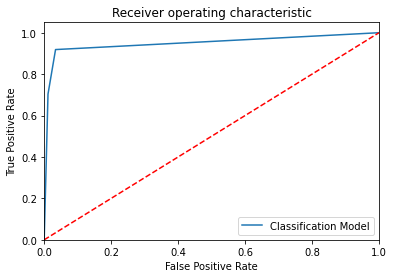

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1813   350]
 [  347 17274]]
Outcome values : 
 1813 350 347 17274
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.84      0.84      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.91      0.91     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.5 %
Precision : 83.9 %
Recall : 83.8 %
F1 Score : 0.839
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 90.9 %
MCC : 0.819
roc_auc_score: 0.909


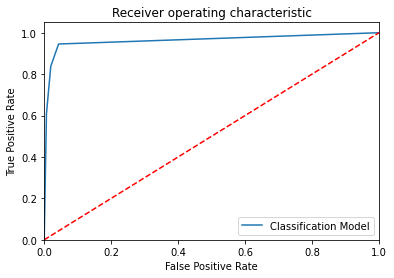

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1646   517]
 [  242 17379]]
Outcome values : 
 1646 517 242 17379
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.76      0.81      2163
           0       0.97      0.99      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.92      0.87      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.2 %
Precision : 87.2 %
Recall : 76.1 %
F1 Score : 0.813
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 87.4 %
MCC : 0.794
roc_auc_score: 0.874


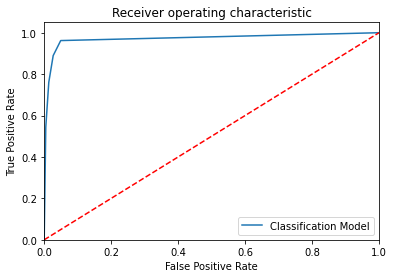

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1806   357]
 [  323 17298]]
Outcome values : 
 1806 357 323 17298
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.83      0.84      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.97     19784
   macro avg       0.91      0.91      0.91     19784
weighted avg       0.97      0.97      0.97     19784

Accuracy : 96.6 %
Precision : 84.8 %
Recall : 83.5 %
F1 Score : 0.842
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 90.8 %
MCC : 0.822
roc_auc_score: 0.908


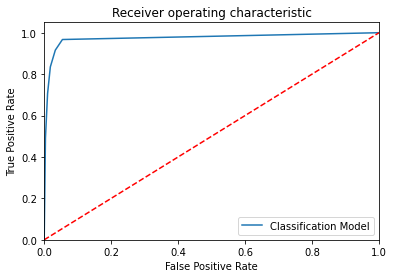

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1693   470]
 [  242 17379]]
Outcome values : 
 1693 470 242 17379
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.78      0.83      2163
           0       0.97      0.99      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.92      0.88      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.4 %
Precision : 87.5 %
Recall : 78.3 %
F1 Score : 0.826
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 88.5 %
MCC : 0.808
roc_auc_score: 0.884


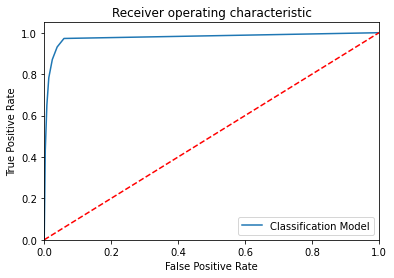

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1775   388]
 [  324 17297]]
Outcome values : 
 1775 388 324 17297
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.83      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.90      0.91     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.4 %
Precision : 84.6 %
Recall : 82.1 %
F1 Score : 0.833
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 90.2 %
MCC : 0.813
roc_auc_score: 0.901


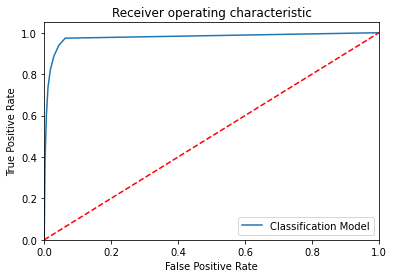

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1684   479]
 [  270 17351]]
Outcome values : 
 1684 479 270 17351
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.78      0.82      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.92      0.88      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.2 %
Precision : 86.2 %
Recall : 77.9 %
F1 Score : 0.818
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 88.2 %
MCC : 0.798
roc_auc_score: 0.882


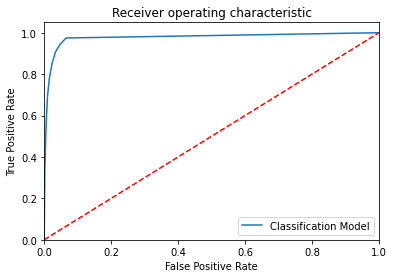

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1755   408]
 [  338 17283]]
Outcome values : 
 1755 408 338 17283
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.81      0.82      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.90      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.2 %
Precision : 83.9 %
Recall : 81.1 %
F1 Score : 0.825
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 89.6 %
MCC : 0.804
roc_auc_score: 0.896


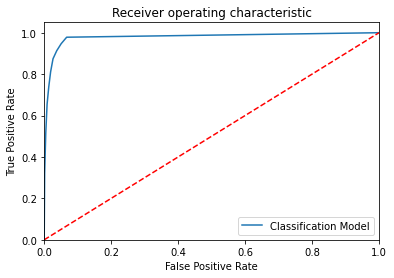

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1682   481]
 [  297 17324]]
Outcome values : 
 1682 481 297 17324
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.78      0.81      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.88      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.1 %
Precision : 85.0 %
Recall : 77.8 %
F1 Score : 0.812
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 88.1 %
MCC : 0.791
roc_auc_score: 0.88


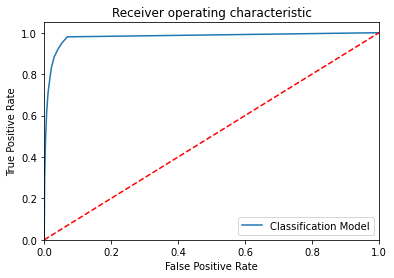

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1735   428]
 [  336 17285]]
Outcome values : 
 1735 428 336 17285
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.80      0.82      2163
           0       0.98      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.89      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.1 %
Precision : 83.8 %
Recall : 80.2 %
F1 Score : 0.82
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 89.2 %
MCC : 0.798
roc_auc_score: 0.892


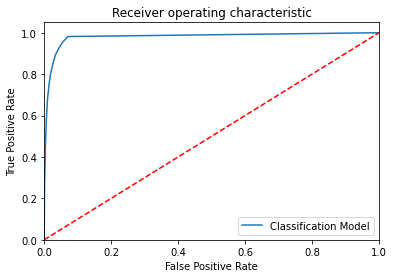

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1671   492]
 [  294 17327]]
Outcome values : 
 1671 492 294 17327
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.77      0.81      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.88      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.0 %
Precision : 85.0 %
Recall : 77.3 %
F1 Score : 0.81
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 87.8 %
MCC : 0.789
roc_auc_score: 0.878


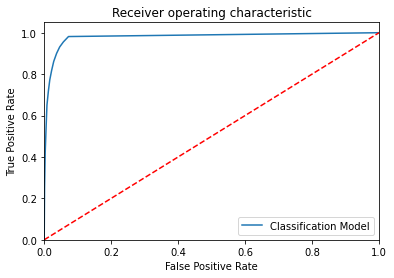

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1710   453]
 [  333 17288]]
Outcome values : 
 1710 453 333 17288
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.79      0.81      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.89      0.90     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 96.0 %
Precision : 83.7 %
Recall : 79.1 %
F1 Score : 0.813
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 88.6 %
MCC : 0.791
roc_auc_score: 0.886


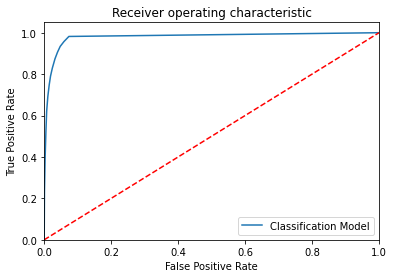

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1651   512]
 [  294 17327]]
Outcome values : 
 1651 512 294 17327
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.87      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.9 %
Precision : 84.9 %
Recall : 76.3 %
F1 Score : 0.804
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 87.3 %
MCC : 0.783
roc_auc_score: 0.873


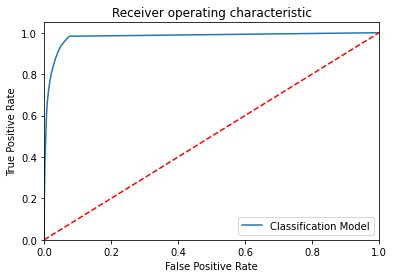

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1677   486]
 [  331 17290]]
Outcome values : 
 1677 486 331 17290
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.78      0.80      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.90      0.88      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.9 %
Precision : 83.5 %
Recall : 77.5 %
F1 Score : 0.804
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 87.8 %
MCC : 0.782
roc_auc_score: 0.878


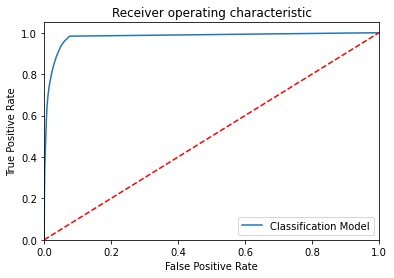

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1635   528]
 [  296 17325]]
Outcome values : 
 1635 528 296 17325
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.87      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.8 %
Precision : 84.7 %
Recall : 75.6 %
F1 Score : 0.799
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 86.9 %
MCC : 0.777
roc_auc_score: 0.87


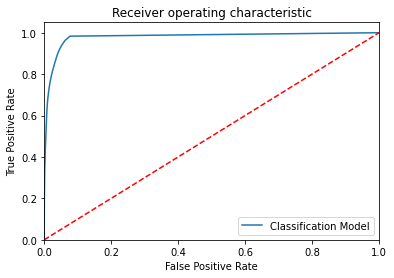

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1668   495]
 [  335 17286]]
Outcome values : 
 1668 495 335 17286
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.77      0.80      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.90      0.88      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.8 %
Precision : 83.3 %
Recall : 77.1 %
F1 Score : 0.801
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 87.6 %
MCC : 0.778
roc_auc_score: 0.876


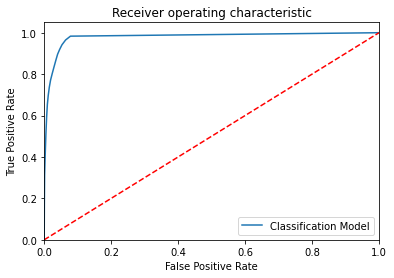

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1623   540]
 [  302 17319]]
Outcome values : 
 1623 540 302 17319
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.75      0.79      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.91      0.87      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.7 %
Precision : 84.3 %
Recall : 75.0 %
F1 Score : 0.794
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 86.6 %
MCC : 0.772
roc_auc_score: 0.867


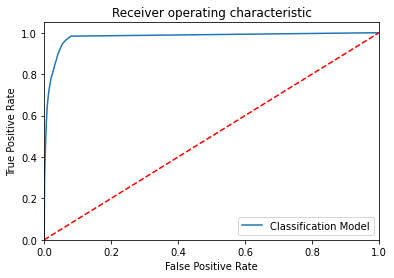

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1648   515]
 [  332 17289]]
Outcome values : 
 1648 515 332 17289
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.76      0.80      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.90      0.87      0.89     19784
weighted avg       0.96      0.96      0.96     19784

Accuracy : 95.7 %
Precision : 83.2 %
Recall : 76.2 %
F1 Score : 0.796
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 87.1 %
MCC : 0.773
roc_auc_score: 0.872


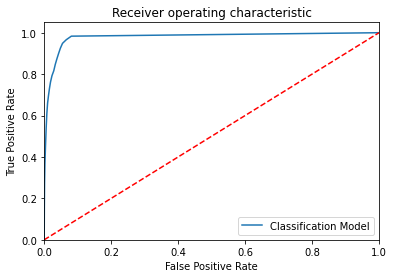

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1600   563]
 [  302 17319]]
Outcome values : 
 1600 563 302 17319
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.74      0.79      2163
           0       0.97      0.98      0.98     17621

    accuracy                           0.96     19784
   macro avg       0.90      0.86      0.88     19784
weighted avg       0.95      0.96      0.96     19784

Accuracy : 95.6 %
Precision : 84.1 %
Recall : 74.0 %
F1 Score : 0.787
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 86.1 %
MCC : 0.765
roc_auc_score: 0.861


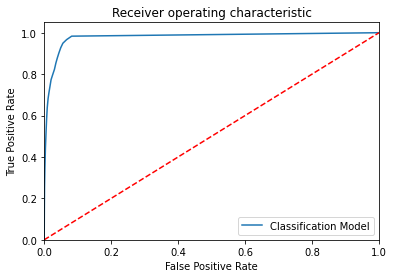

In [32]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  925  1238]
 [    9 17612]]
Outcome values : 
 925 1238 9 17612
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.43      0.60      2163
           0       0.93      1.00      0.97     17621

    accuracy                           0.94     19784
   macro avg       0.96      0.71      0.78     19784
weighted avg       0.94      0.94      0.93     19784

Accuracy : 93.7 %
Precision : 99.0 %
Recall : 42.8 %
F1 Score : 0.597
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 71.4 %
MCC : 0.628
roc_auc_score: 0.714


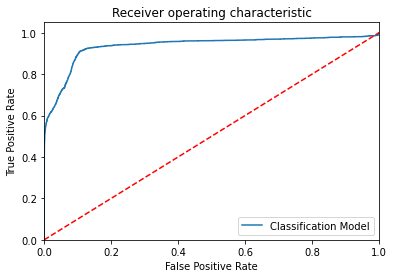

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1911   252]
 [  192 17429]]
Outcome values : 
 1911 252 192 17429
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.88      0.90      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.95      0.94      0.94     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 97.8 %
Precision : 90.9 %
Recall : 88.3 %
F1 Score : 0.896
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 93.6 %
MCC : 0.883
roc_auc_score: 0.936


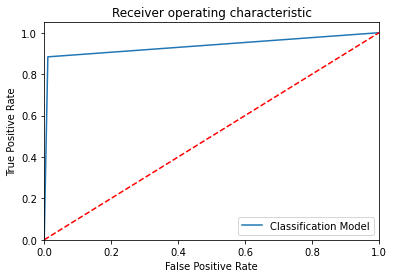

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1943   220]
 [  125 17496]]
Outcome values : 
 1943 220 125 17496
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.90      0.92      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.96      0.95      0.95     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 98.3 %
Precision : 94.0 %
Recall : 89.8 %
F1 Score : 0.918
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 94.6 %
MCC : 0.909
roc_auc_score: 0.946


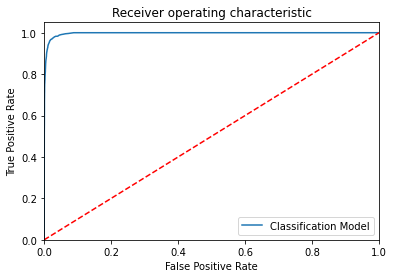

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1975   188]
 [  137 17484]]
Outcome values : 
 1975 188 137 17484
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.91      0.92      2163
           0       0.99      0.99      0.99     17621

    accuracy                           0.98     19784
   macro avg       0.96      0.95      0.96     19784
weighted avg       0.98      0.98      0.98     19784

Accuracy : 98.4 %
Precision : 93.5 %
Recall : 91.3 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 95.2 %
MCC : 0.915
roc_auc_score: 0.953


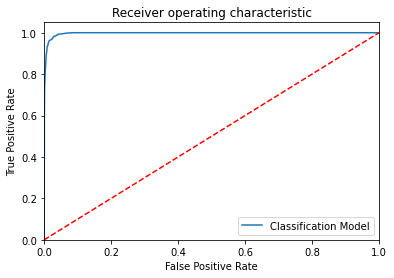

-----------------------------------------------------------------------------------------------------


In [33]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




In [34]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),925,1238,9,17612,0.937,0.990,0.428,0.597,0.999,0.628,0.713568,0.714
1,DecisionTreeClassifier(),1907,256,203,17418,0.977,0.904,0.882,0.893,0.988,0.880,0.935063,0.935
2,"(DecisionTreeClassifier(max_features='auto', r...",1949,214,139,17482,0.982,0.933,0.901,0.917,0.992,0.907,0.946588,0.946
3,"(ExtraTreeClassifier(random_state=936030666), ...",1971,192,133,17488,0.984,0.937,0.911,0.924,0.992,0.915,0.951843,0.952
4,KNeighborsClassifier(),1806,357,323,17298,0.966,0.848,0.835,0.842,0.982,0.822,0.908311,0.908
5,"SVC(class_weight='balanced', probability=True,...",2077,86,911,16710,0.950,0.695,0.960,0.806,0.948,0.792,0.954270,0.954
6,LogisticRegression(),925,1238,9,17612,0.937,0.990,0.428,0.597,0.999,0.628,0.713568,0.714
7,DecisionTreeClassifier(),1911,252,192,17429,0.978,0.909,0.883,0.896,0.989,0.883,0.936300,0.936
8,"(DecisionTreeClassifier(max_features='auto', r...",1943,220,125,17496,0.983,0.940,0.898,0.918,0.993,0.909,0.945598,0.946
9,"(ExtraTreeClassifier(random_state=1940747004),...",1975,188,137,17484,0.984,0.935,0.913,0.924,0.992,0.915,0.952654,0.952


In [35]:
#predict the values with KNN algorithm
y_pred=ModelKNN.predict(x_test)

In [38]:
#display the final results 
Results = pd.DataFrame({'fraud_A':y_test, 'fraud_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = fd_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
ResultsFinal['%Error'] = round(((ResultsFinal['fraud_A']-ResultsFinal['fraud_P'])/ResultsFinal['fraud_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,fraud_A,fraud_P,%Error
177318,61,'C1914083426','2','M','28007','M348934600','28007','es_transportation',21.85,0,0,0,NaN
484429,150,'C77017704','2','F','28007','M1823072687','28007','es_transportation',3.25,0,0,0,NaN
314848,102,'C1984017083','2','M','28007','M1823072687','28007','es_transportation',63.23,0,0,0,NaN
516150,158,'C1053477622','2','M','28007','M1823072687','28007','es_transportation',50.11,0,0,0,NaN
47272,18,'C391642320','3','F','28007','M348934600','28007','es_transportation',15.18,0,0,0,NaN
65142,24,'C795132749','5','F','28007','M1823072687','28007','es_transportation',53.43,0,0,0,NaN
354420,114,'C77017704','2','F','28007','M1823072687','28007','es_transportation',77.81,0,0,0,NaN
190038,65,'C724380392','2','F','28007','M348934600','28007','es_transportation',38.14,0,0,0,NaN
252853,84,'C881776576','2','M','28007','M348934600','28007','es_transportation',25.38,0,0,0,NaN
5761,2,'C1200311106','3','F','28007','M348934600','28007','es_transportation',6.91,0,1,1,0.0
